In [23]:
library(tidyverse)
library(vroom)
library(ggforce)
library(cowplot)
library(brms)
theme_set(cowplot::theme_cowplot(font_size = 12))

In [35]:
source("../color_df.R")

all_files = list.files(path = "../data/angsd_pi", full.names = TRUE)
pi_files = all_files[grep(pattern = "100000BP", all_files)]


pi_df <- 
pi_files %>% 
    map_df(~{
       vroom(.x, delim = "\t", col_names = TRUE) %>% 
        filter(nSites > 100000 * 0.2) %>% 
        #filter(nSites > 1000 * 0.2) %>% 
        mutate(
            pi = tW/nSites,
            pop = str_replace(string = .x, pattern = "../data/angsd_pi/", replacement = ""),
            pop = str_replace(string = pop, pattern = ".100000BP_theta.thetasWindow.gz.pestPG", replacement = ""),
            pop = str_replace(string = pop, pattern = ".1000BP_theta.thetasWindow.gz.pestPG", replacement = ""),
            )
    }) %>% 
    separate(col = pop, into = c("ref", "subspecies", "pop"), sep = "--")


Rows: 21,326
Columns: 14
Delimiter: "\t"
chr [ 2]: #(indexStart,indexStop)(firstPos_withData,lastPos_withData)(WinStart,WinStop), Chr
dbl [12]: WinCenter, tW, tP, tF, tH, tL, Tajima, fuf, fud, fayh, zeng, nSites

Use `spec()` to retrieve the guessed column specification
Pass a specification to the `col_types` argument to quiet this message
Rows: 21,327
Columns: 14
Delimiter: "\t"
chr [ 2]: #(indexStart,indexStop)(firstPos_withData,lastPos_withData)(WinStart,WinStop), Chr
dbl [12]: WinCenter, tW, tP, tF, tH, tL, Tajima, fuf, fud, fayh, zeng, nSites

Use `spec()` to retrieve the guessed column specification
Pass a specification to the `col_types` argument to quiet this message
Rows: 21,326
Columns: 14
Delimiter: "\t"
chr [ 2]: #(indexStart,indexStop)(firstPos_withData,lastPos_withData)(WinStart,WinStop), Chr
dbl [12]: WinCenter, tW, tP, tF, tH, tL, Tajima, fuf, fud, fayh, zeng, nSites

Use `spec()` to retrieve the guessed column specification
Pass a specification to the `col_types` argum

`summarise()` regrouping output by 'subspecies' (override with `.groups` argument)


subspecies,pop,mean(pi)
LR,Amatlan_de_Canas,0.005633300
LR,Crucero_Lagunitas,0.004974730
LR,Los_Guajes,0.005033849
LR,Palmar_Chico,0.006186484
LR,random,0.005940624
LR,random1_Palmar_Chico,0.005340370
LR,random2_Palmar_Chico,0.005463692
LR,San_Lorenzo,0.005767100
Teo,Amatlan_de_Canas,0.005371032
Teo,Crucero_Lagunitas,0.005522545


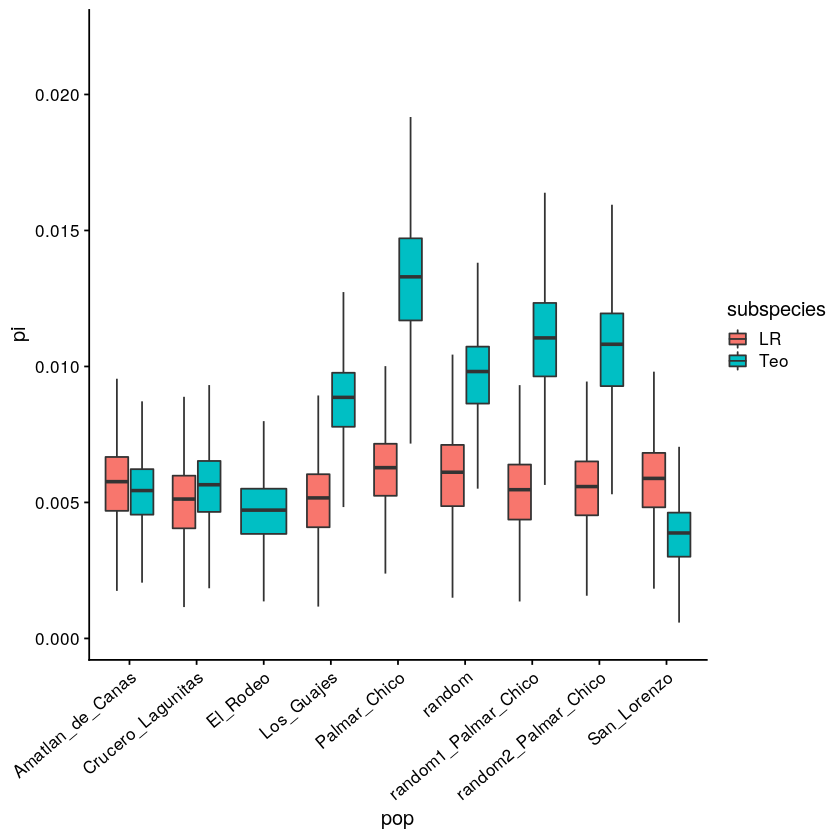

In [48]:
pi_df %>% 
ggplot(aes(x = pop, y = pi, fill = subspecies)) +
    geom_boxplot(outlier.shape = NA) +
    theme(axis.text.x=element_text(angle = 40, hjust = 1)) 
    
pi_df %>% 
    group_by(subspecies, pop) %>% 
    summarise(mean(pi))

`summarise()` regrouping output by 'subspecies' (override with `.groups` argument)


subspecies,pop,mean(Tajima)
LR,Amatlan_de_Canas,-0.15693029
LR,Crucero_Lagunitas,0.27487748
LR,Los_Guajes,-0.01492831
LR,Palmar_Chico,-0.27822942
LR,random,-0.26544389
LR,random1_Palmar_Chico,-0.08224528
LR,random2_Palmar_Chico,-0.14757518
LR,San_Lorenzo,-0.19001645
Teo,Amatlan_de_Canas,0.57168898
Teo,Crucero_Lagunitas,0.33840118


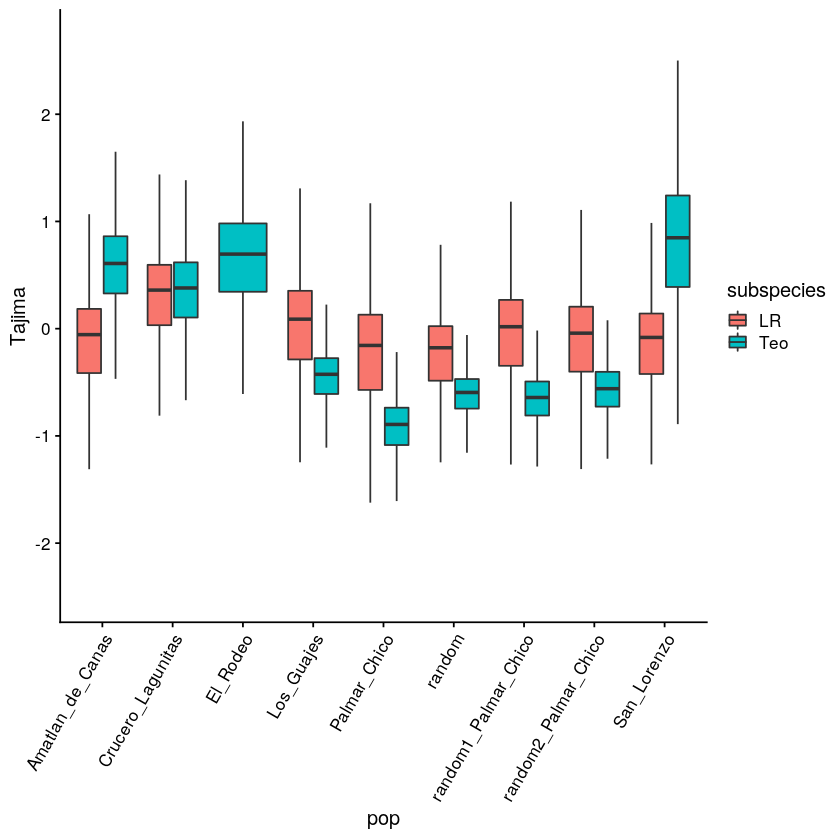

In [44]:
pi_df %>% 
ggplot(aes(x = pop, y = Tajima, fill = subspecies)) +
    geom_boxplot(outlier.shape = NA) +
    theme(axis.text.x=element_text(angle = 60, hjust = 1)) 
    
pi_df %>% 
    group_by(subspecies, pop) %>% 
    summarise(mean(Tajima))